In [ ]:
#Downloading the dataset from Kaggle
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paramaggarwal/fashion-product-images-small

 99% 558M/565M [00:08<00:00, 100MB/s] 
100% 565M/565M [00:08<00:00, 70.0MB/s]


In [ ]:
! unzip fashion-product-images-small.zip

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

In [ ]:
#Importing the necessary libraries
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [ ]:
#Creating the ResNet 50 model
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False # Since we do not need to train the model

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
#Adding a maxpooling layer on top of ResNet model
model=tensorflow.keras.Sequential([
    model, GlobalMaxPooling2D()
]
)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
def extract_features(img_path,model):
  img=image.load_img(img_path,target_size=(224,224))
  image_array=image.img_to_array(img)
  expanded_img_array=np.expand_dims(image_array,axis=0)
  preprocessed_image=preprocess_input(expanded_img_array)
  result=model.predict(preprocessed_image).flatten()
  normalized_result=result/norm(result)

  return normalized_result

In [ ]:
#Prepare a list of filenames
import os
filenames=[]
for file in os.listdir('images'):
  filenames.append(os.path.join('images',file))



In [ ]:
import random
filenames2=[]
num_elements_to_select=int(0.5*len(filenames))
filenames2=random.sample(filenames,num_elements_to_select)

In [30]:
# len(filenames)
filenames2[:5]

['images/19120.jpg',
 'images/40756.jpg',
 'images/57404.jpg',
 'images/3427.jpg',
 'images/2479.jpg']

In [ ]:
from tqdm import tqdm
feature_list=[]
for file in tqdm(filenames2):
  feature_list.append(extract_features(file,model))

1/1 [==============================] - 0s 460ms/step


100%|█████████▉| 22145/22220 [3:53:06<00:51,  1.46it/s]

1/1 [==============================] - 0s 373ms/step


100%|█████████▉| 22146/22220 [3:53:06<00:47,  1.55it/s]

1/1 [==============================] - 0s 456ms/step


100%|█████████▉| 22147/22220 [3:53:07<00:46,  1.59it/s]

1/1 [==============================] - 0s 441ms/step


100%|█████████▉| 22148/22220 [3:53:08<00:49,  1.45it/s]

1/1 [==============================] - 0s 412ms/step


100%|█████████▉| 22149/22220 [3:53:09<00:52,  1.36it/s]

1/1 [==============================] - 0s 466ms/step


100%|█████████▉| 22150/22220 [3:53:09<00:48,  1.44it/s]

1/1 [==============================] - 0s 486ms/step


100%|█████████▉| 22151/22220 [3:53:10<00:46,  1.47it/s]

1/1 [==============================] - 0s 429ms/step


100%|█████████▉| 22152/22220 [3:53:11<00:48,  1.40it/s]

1/1 [==============================] - 0s 343ms/step


100%|█████████▉| 22153/22220 [3:53:11<00:48,  1.38it/s]

1/1 [==============================] - 0s 329ms/step


100%|█████████▉| 22154/22220 [3:53:12<00:42,  1.56it/s]

1/1 [==============================] - 0s 350ms/step


100%|█████████▉| 22155/22220 [3:53:13<00:45,  1.42it/s]

1/1 [==============================] - 0s 358ms/step


100%|█████████▉| 22156/22220 [3:53:14<00:46,  1.38it/s]

1/1 [==============================] - 0s 362ms/step


100%|█████████▉| 22157/22220 [3:53:14<00:41,  1.53it/s]

1/1 [==============================] - 0s 385ms/step


100%|█████████▉| 22158/22220 [3:53:15<00:43,  1.43it/s]

1/1 [==============================] - 0s 362ms/step


100%|█████████▉| 22159/22220 [3:53:16<00:44,  1.38it/s]

1/1 [==============================] - 0s 350ms/step


100%|█████████▉| 22160/22220 [3:53:16<00:38,  1.54it/s]

1/1 [==============================] - 0s 333ms/step


100%|█████████▉| 22161/22220 [3:53:17<00:34,  1.71it/s]

1/1 [==============================] - 0s 379ms/step


100%|█████████▉| 22162/22220 [3:53:17<00:32,  1.76it/s]

1/1 [==============================] - 0s 343ms/step


100%|█████████▉| 22163/22220 [3:53:18<00:30,  1.87it/s]

1/1 [==============================] - 0s 361ms/step


100%|█████████▉| 22164/22220 [3:53:18<00:35,  1.59it/s]

1/1 [==============================] - 0s 361ms/step


100%|█████████▉| 22165/22220 [3:53:19<00:36,  1.49it/s]

1/1 [==============================] - 0s 362ms/step


100%|█████████▉| 22166/22220 [3:53:20<00:37,  1.43it/s]

1/1 [==============================] - 0s 355ms/step


100%|█████████▉| 22167/22220 [3:53:21<00:38,  1.39it/s]

1/1 [==============================] - 0s 415ms/step


100%|█████████▉| 22168/22220 [3:53:21<00:34,  1.49it/s]

1/1 [==============================] - 0s 441ms/step


100%|█████████▉| 22169/22220 [3:53:22<00:33,  1.53it/s]

1/1 [==============================] - 0s 400ms/step


100%|█████████▉| 22170/22220 [3:53:22<00:31,  1.61it/s]

1/1 [==============================] - 0s 447ms/step


100%|█████████▉| 22171/22220 [3:53:23<00:29,  1.63it/s]

1/1 [==============================] - 0s 391ms/step


100%|█████████▉| 22172/22220 [3:53:24<00:28,  1.71it/s]

1/1 [==============================] - 1s 504ms/step


100%|█████████▉| 22173/22220 [3:53:24<00:28,  1.66it/s]

1/1 [==============================] - 0s 471ms/step


100%|█████████▉| 22174/22220 [3:53:25<00:30,  1.50it/s]

1/1 [==============================] - 0s 469ms/step


100%|█████████▉| 22175/22220 [3:53:26<00:31,  1.41it/s]

1/1 [==============================] - 0s 364ms/step


100%|█████████▉| 22176/22220 [3:53:27<00:32,  1.36it/s]

1/1 [==============================] - 0s 432ms/step


100%|█████████▉| 22177/22220 [3:53:27<00:32,  1.33it/s]

1/1 [==============================] - 0s 387ms/step


100%|█████████▉| 22178/22220 [3:53:28<00:28,  1.47it/s]

1/1 [==============================] - 0s 478ms/step


100%|█████████▉| 22179/22220 [3:53:29<00:29,  1.39it/s]

1/1 [==============================] - 0s 391ms/step


100%|█████████▉| 22180/22220 [3:53:29<00:26,  1.51it/s]

1/1 [==============================] - 0s 376ms/step


100%|█████████▉| 22181/22220 [3:53:30<00:27,  1.43it/s]

1/1 [==============================] - 0s 456ms/step


100%|█████████▉| 22182/22220 [3:53:31<00:25,  1.47it/s]

1/1 [==============================] - 1s 512ms/step


100%|█████████▉| 22183/22220 [3:53:32<00:27,  1.35it/s]

1/1 [==============================] - 0s 407ms/step


100%|█████████▉| 22184/22220 [3:53:32<00:27,  1.33it/s]

1/1 [==============================] - 0s 423ms/step


100%|█████████▉| 22185/22220 [3:53:33<00:24,  1.43it/s]

1/1 [==============================] - 0s 446ms/step


100%|█████████▉| 22186/22220 [3:53:34<00:24,  1.38it/s]

1/1 [==============================] - 0s 446ms/step


100%|█████████▉| 22187/22220 [3:53:34<00:22,  1.47it/s]

1/1 [==============================] - 1s 520ms/step


100%|█████████▉| 22188/22220 [3:53:35<00:21,  1.46it/s]

1/1 [==============================] - 0s 410ms/step


100%|█████████▉| 22189/22220 [3:53:35<00:20,  1.55it/s]

1/1 [==============================] - 0s 367ms/step


100%|█████████▉| 22190/22220 [3:53:36<00:18,  1.65it/s]

1/1 [==============================] - 0s 360ms/step


100%|█████████▉| 22191/22220 [3:53:37<00:19,  1.51it/s]

1/1 [==============================] - 0s 366ms/step


100%|█████████▉| 22192/22220 [3:53:38<00:19,  1.43it/s]

1/1 [==============================] - 0s 438ms/step


100%|█████████▉| 22193/22220 [3:53:38<00:19,  1.36it/s]

1/1 [==============================] - 1s 522ms/step


100%|█████████▉| 22194/22220 [3:53:39<00:19,  1.30it/s]

1/1 [==============================] - 0s 478ms/step


100%|█████████▉| 22195/22220 [3:53:40<00:19,  1.29it/s]

1/1 [==============================] - 0s 440ms/step


100%|█████████▉| 22196/22220 [3:53:41<00:18,  1.28it/s]

1/1 [==============================] - 0s 455ms/step


100%|█████████▉| 22197/22220 [3:53:42<00:18,  1.25it/s]

1/1 [==============================] - 0s 397ms/step


100%|█████████▉| 22198/22220 [3:53:42<00:17,  1.24it/s]

1/1 [==============================] - 0s 381ms/step


100%|█████████▉| 22199/22220 [3:53:43<00:15,  1.38it/s]

1/1 [==============================] - 0s 341ms/step


100%|█████████▉| 22200/22220 [3:53:44<00:14,  1.34it/s]

1/1 [==============================] - 0s 356ms/step


100%|█████████▉| 22201/22220 [3:53:45<00:14,  1.33it/s]

1/1 [==============================] - 0s 359ms/step


100%|█████████▉| 22202/22220 [3:53:45<00:13,  1.32it/s]

1/1 [==============================] - 0s 320ms/step


100%|█████████▉| 22203/22220 [3:53:46<00:11,  1.52it/s]

1/1 [==============================] - 0s 358ms/step


100%|█████████▉| 22204/22220 [3:53:46<00:09,  1.66it/s]

1/1 [==============================] - 0s 338ms/step


100%|█████████▉| 22205/22220 [3:53:47<00:08,  1.80it/s]

1/1 [==============================] - 0s 346ms/step


100%|█████████▉| 22206/22220 [3:53:47<00:08,  1.63it/s]

1/1 [==============================] - 0s 340ms/step


100%|█████████▉| 22207/22220 [3:53:48<00:08,  1.52it/s]

1/1 [==============================] - 0s 350ms/step


100%|█████████▉| 22208/22220 [3:53:49<00:07,  1.66it/s]

1/1 [==============================] - 0s 381ms/step


100%|█████████▉| 22209/22220 [3:53:50<00:07,  1.49it/s]

1/1 [==============================] - 0s 343ms/step


100%|█████████▉| 22210/22220 [3:53:50<00:06,  1.65it/s]

1/1 [==============================] - 0s 365ms/step


100%|█████████▉| 22211/22220 [3:53:50<00:05,  1.76it/s]

1/1 [==============================] - 0s 335ms/step


100%|█████████▉| 22212/22220 [3:53:51<00:04,  1.61it/s]

1/1 [==============================] - 0s 351ms/step


100%|█████████▉| 22213/22220 [3:53:52<00:04,  1.73it/s]

1/1 [==============================] - 0s 381ms/step


100%|█████████▉| 22214/22220 [3:53:52<00:03,  1.58it/s]

1/1 [==============================] - 0s 379ms/step


100%|█████████▉| 22215/22220 [3:53:53<00:03,  1.46it/s]

1/1 [==============================] - 0s 381ms/step


100%|█████████▉| 22216/22220 [3:53:54<00:02,  1.57it/s]

1/1 [==============================] - 0s 401ms/step


100%|█████████▉| 22217/22220 [3:53:55<00:02,  1.45it/s]

1/1 [==============================] - 0s 445ms/step


100%|█████████▉| 22218/22220 [3:53:55<00:01,  1.50it/s]

1/1 [==============================] - 0s 404ms/step


100%|█████████▉| 22219/22220 [3:53:56<00:00,  1.57it/s]

1/1 [==============================] - 0s 482ms/step


100%|██████████| 22220/22220 [3:53:56<00:00,  1.58it/s]


In [ ]:
#Export the feature_list and filenames
import pickle
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames2,open('filenames.pkl','wb'))

In [36]:
#Providing recommendations based on similarity with training images
feature_list=np.array(pickle.load(open('embeddings.pkl','rb')))
filenames=np.array(pickle.load(open('filenames.pkl','rb')))

model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False # Since we do not need to train the model
model=tensorflow.keras.Sequential([
    model, GlobalMaxPooling2D()]
)

#Creating feature_list for test image
img=image.load_img('/content/1542.jpg',target_size=(224,224))
image_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(image_array,axis=0)
preprocessed_image=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_image).flatten()
normalized_result=result/norm(result)


1/1 [==============================] - 5s 5s/step


In [37]:
#Creating nearest neighbours model for checking distances
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list) #Fitting on trained data
distances, indices = neighbors.kneighbors([normalized_result])


In [38]:
indices

array([[21108, 11243,  7879, 12465, 17654]])

In [24]:
distances

array([[0.        , 0.57827463, 0.5814961 , 0.58595146, 0.59368984]])

In [39]:
for file in indices[0]:
  print(filenames2[file])

images/20277.jpg
images/9058.jpg
images/9397.jpg
images/10161.jpg
images/13535.jpg


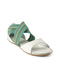

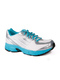

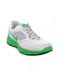

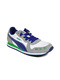

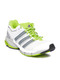

In [40]:
#Printing the images
from google.colab.patches import cv2_imshow
for file in indices[0]:
  temp_img=cv2.imread(filenames2[file],cv2.IMREAD_UNCHANGED)
  cv2_imshow(temp_img)
